# 2nd last question incomplete

## EDA And Feature Engineering Of Google Play Store Dataset

1. Problem statement.
   Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2. Data Collection.

The data consists of 20 column and 10841 rows.


### Steps We Are Going to Follow

1. Data Clearning
2. Exploratory Data Analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [ ]:
df = pd.read_csv('googleplaystore.csv')
df.head()


In [ ]:
df.shape


In [ ]:
df.info()


In [ ]:
df.describe()


## Feature Engineering


##### Missing Values


In [ ]:
df.isnull().sum()


##### Observations

- The dataset has misssing values:
  - Rating has 1474 missing values.
  - Type has 1 missing values.
  - Content Rating has 1 missing value.
  - Currency Rating has 8 missing values.
  - Android Ver has 3 missing values.


In [ ]:
df.head()


In [ ]:
df['Reviews'].nunique()


In [ ]:
df['Reviews'].str.isnumeric().sum(), df.shape


In [ ]:
df[~df['Reviews'].str.isnumeric()]


In [ ]:
df_copy = df.copy()


In [ ]:
df_copy.head(2)


In [ ]:
df_copy.drop(df_copy.index[10472], inplace=True)
df_copy[~df_copy['Reviews'].str.isnumeric()]


In [ ]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)


In [ ]:
df_copy.info()


##### Size feature


In [ ]:
df_copy['Size'].nunique()


In [ ]:
df_copy['Size'].unique()


In [ ]:
df_copy['Size'] = df_copy['Size'].str.replace('M', '000')
df_copy['Size'] = df_copy['Size'].str.replace('k', '')
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)
# df_copy['Size'] = df_copy['Size'].str.replace('.', (df_copy['Size'].astype(int))/10)
df_copy['Size'] = df_copy['Size'].astype(float)


In [ ]:
df_copy.info()


##### Installs


In [ ]:
df_copy['Price'].nunique(), df_copy['Price'].unique()


In [ ]:
df['Installs'].nunique(), df['Installs'].unique()


In [ ]:
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols] = df_copy[cols].str.replace(item, '')


In [ ]:
df_copy['Price'].nunique(), df_copy['Price'].unique()


In [ ]:
df_copy['Installs'].nunique(), df_copy['Installs'].unique()


In [ ]:
df.info()


In [ ]:
df_copy['Installs'] = df_copy['Installs'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(float)


In [ ]:
df_copy.info()


In [ ]:
df.head(2)


#### 'Last Updated'


In [ ]:
df['Last Updated'].head()


In [ ]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year


In [ ]:
df_copy.info()


In [ ]:
df_copy['Content Rating'].value_counts()


## EDA


In [ ]:
df.head()


In [374]:
df_copy[df_copy.duplicated('App')]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [375]:
df_copy.duplicated('App').sum()


1181

In [376]:
df_copy.drop_duplicates('App', inplace=True)
df_copy.duplicated().sum()


0

In [377]:
df_copy[df_copy.duplicated('App')].shape


(0, 16)

##### Observation:

- The dataset has dupliates and has been dropepd successfully.


## Lets go ahead and explore more data


In [378]:
numeric_features = [
    feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [
    feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(
    len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(
    len(categorical_features), categorical_features))


We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## Visualization Diagrams


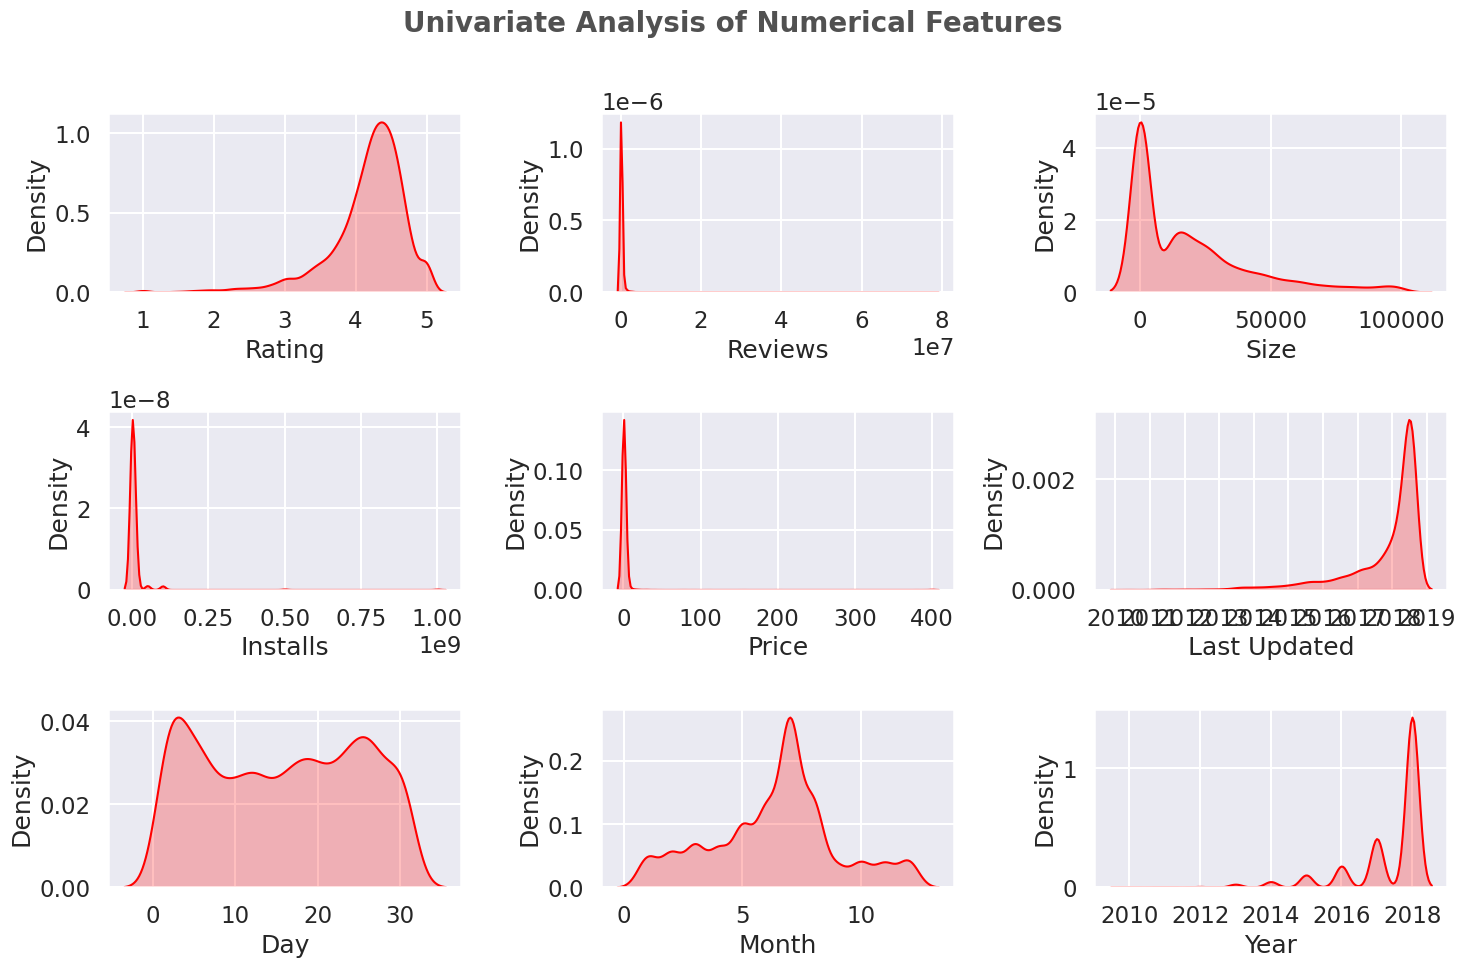

In [379]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features',
             fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]], shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


##### Observations

- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed


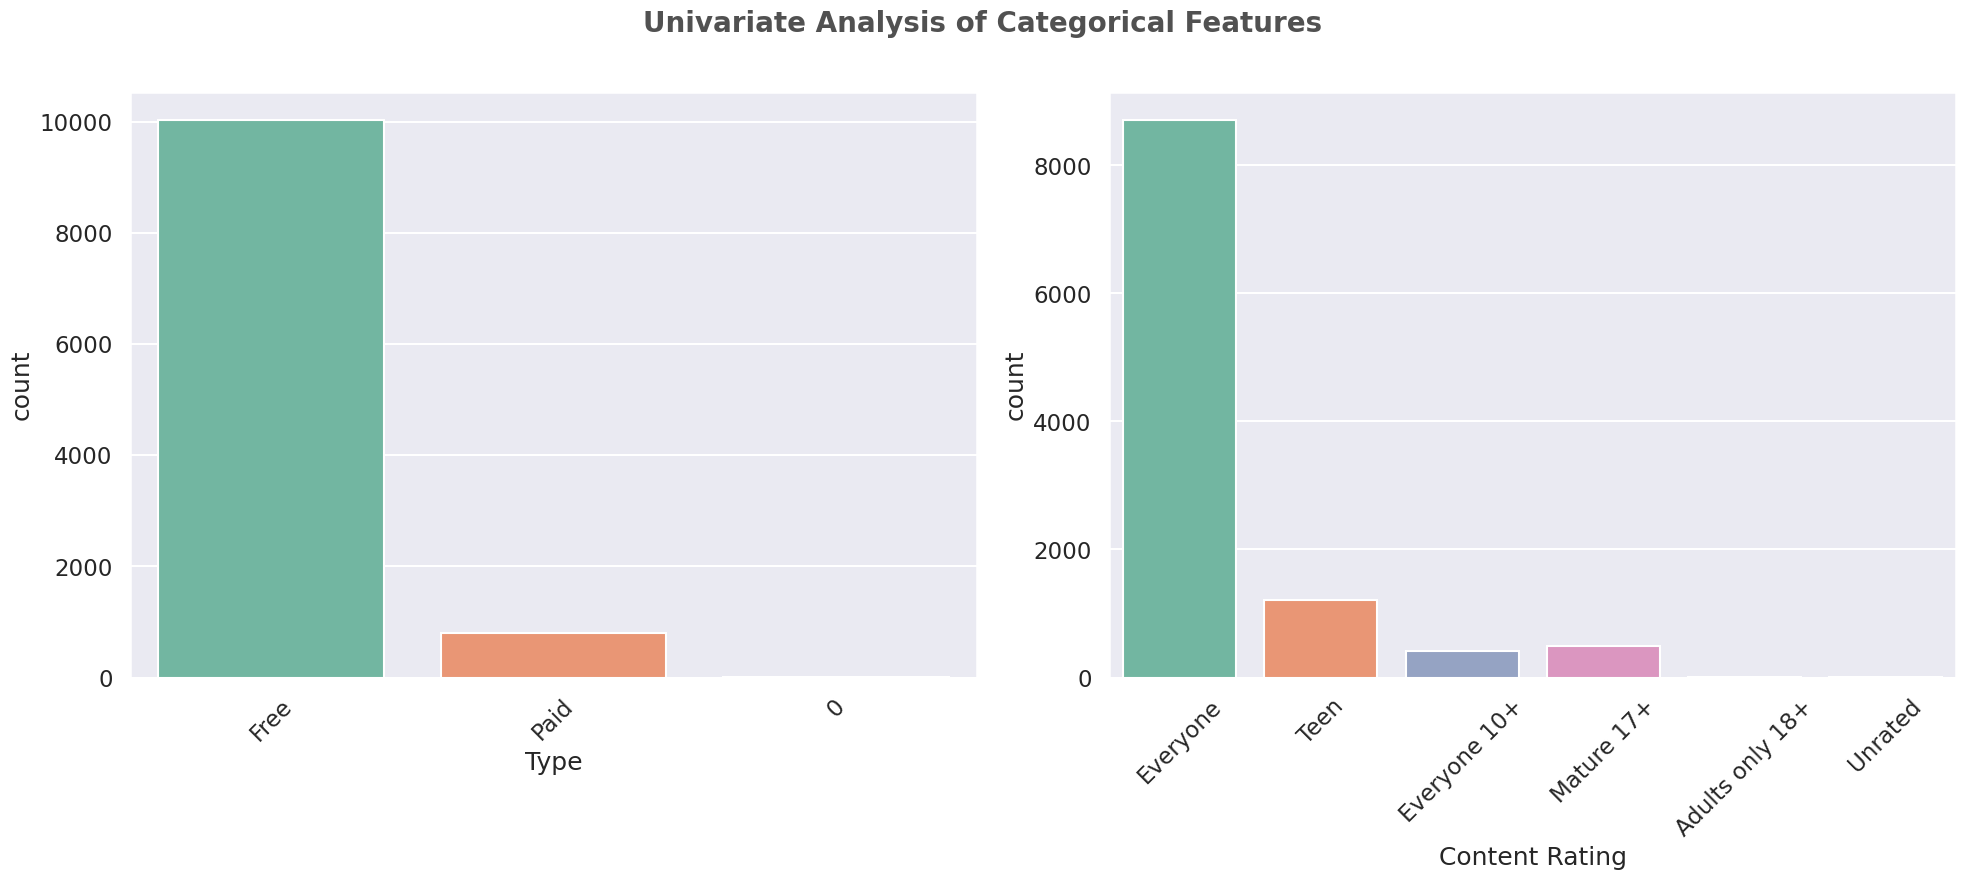

In [380]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features',
             fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()


#### Which is the most popular app category?


In [381]:
df_copy.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


<Axes: ylabel='Category'>

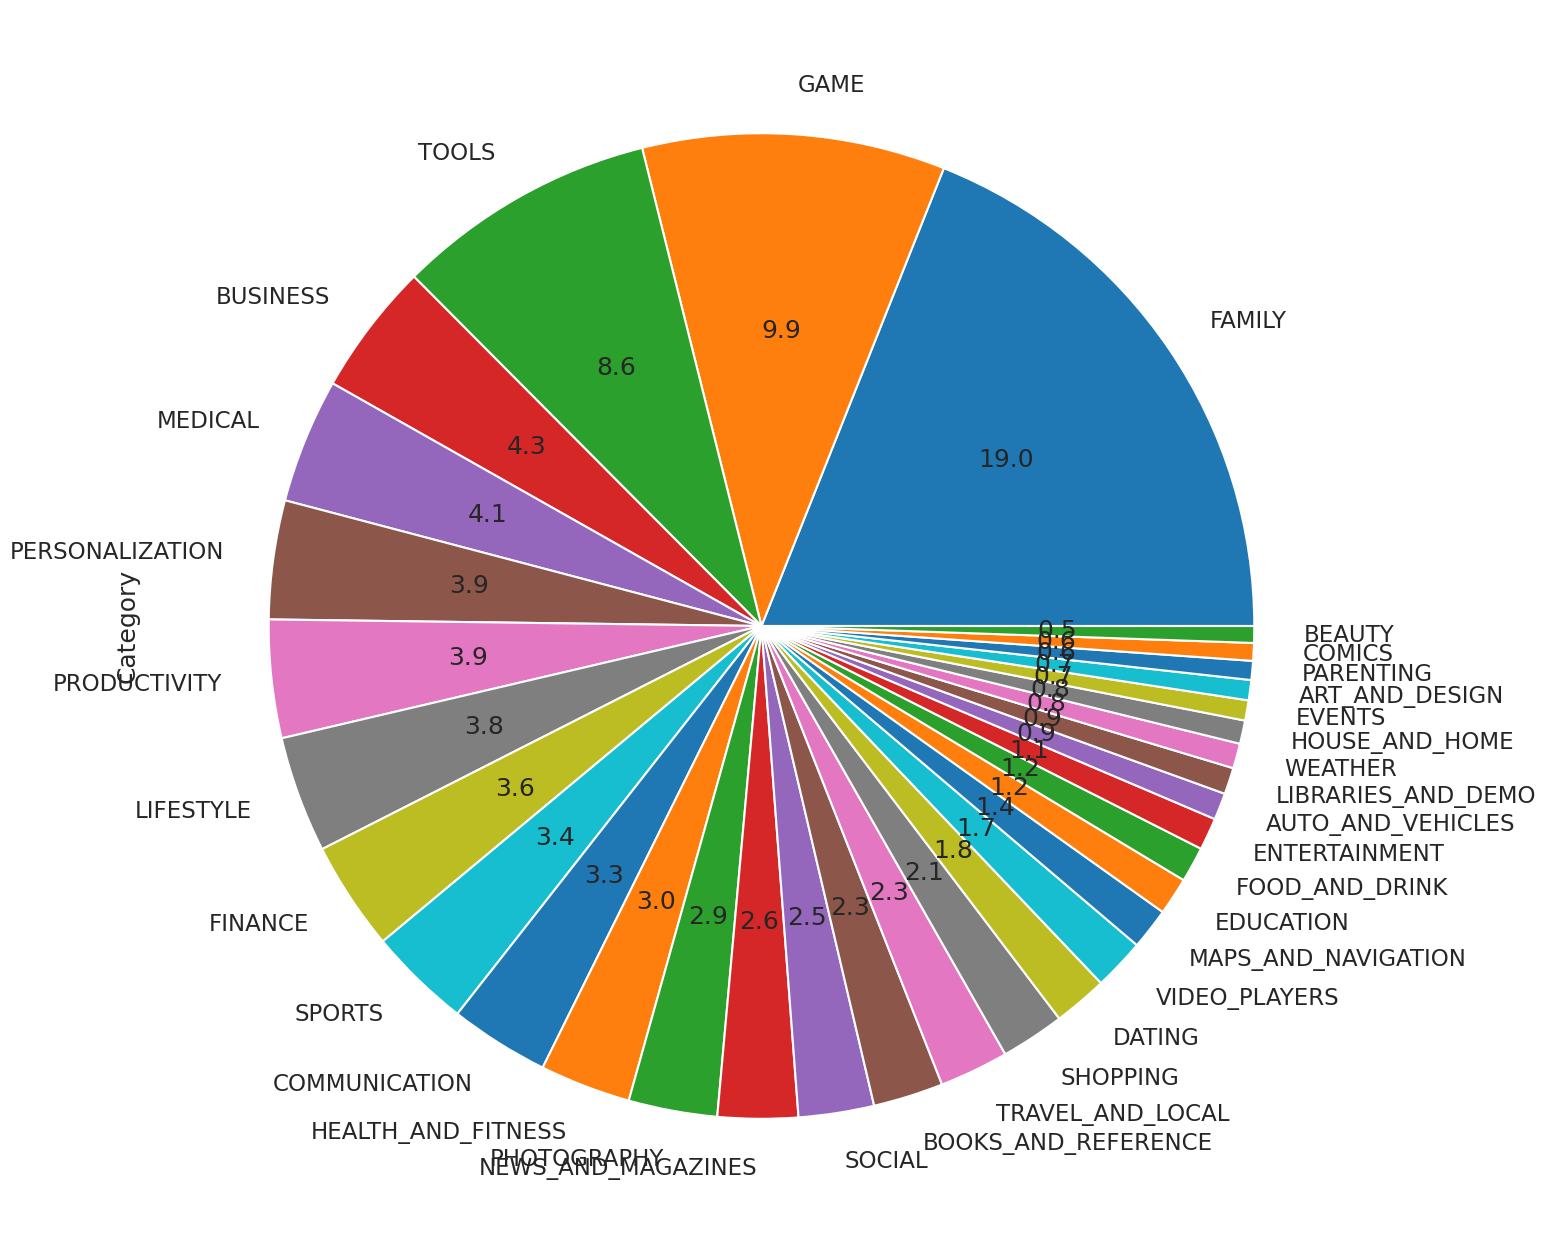

In [382]:
df_copy['Category'].value_counts().plot.pie(
    y=df_copy['Category'], figsize=(16, 16), autopct='%1.1f')


## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore


##### Top 10 App Categories


##### Dataframe of apps on the basis of category


In [383]:
category = pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns={'Category': 'Count'}, inplace=True)
# category.head(10)
# df_copy['Category'].value_counts().sort_values(ascending=False).head(10)
category

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


##### Top 10 app


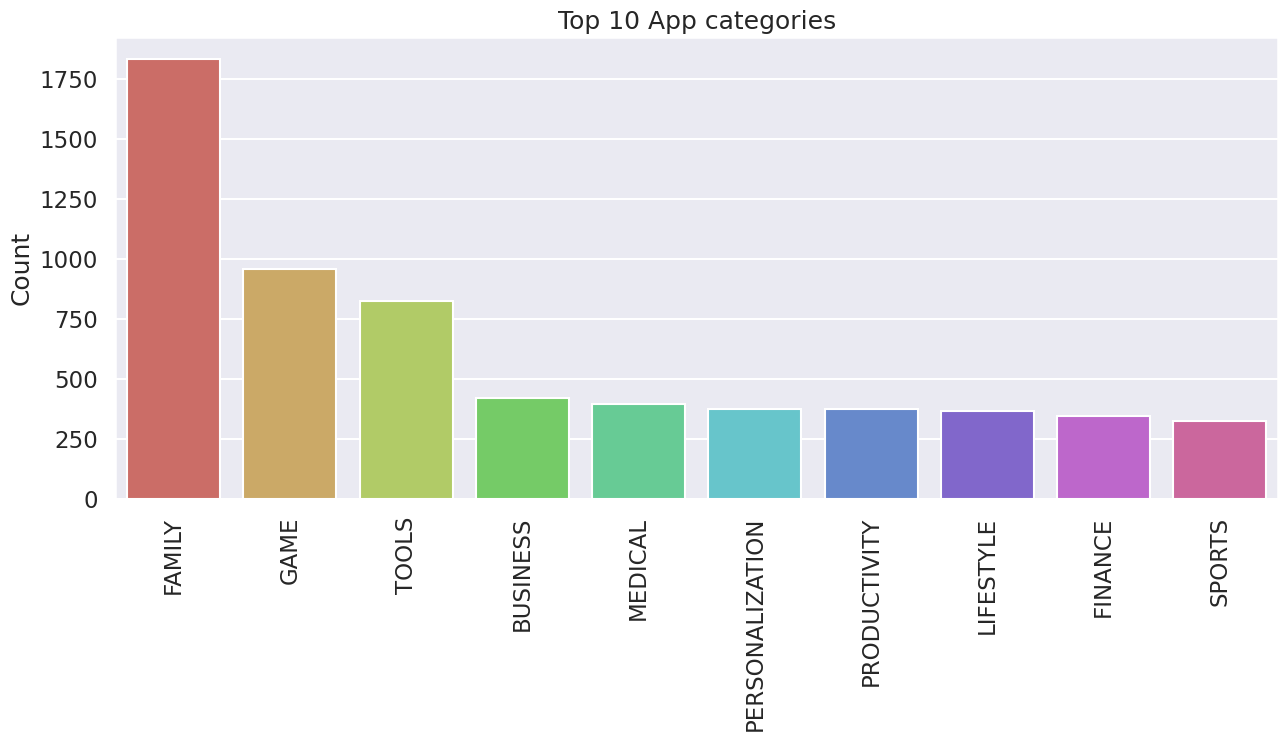

In [384]:
plt.figure(figsize=(15, 6))
sns.barplot(x=category.index[:10], y='Count',
            data=category[:10], palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

## Insights

1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.


## Internal Assignments

1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??


#### Which Category has largest number of installations??


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

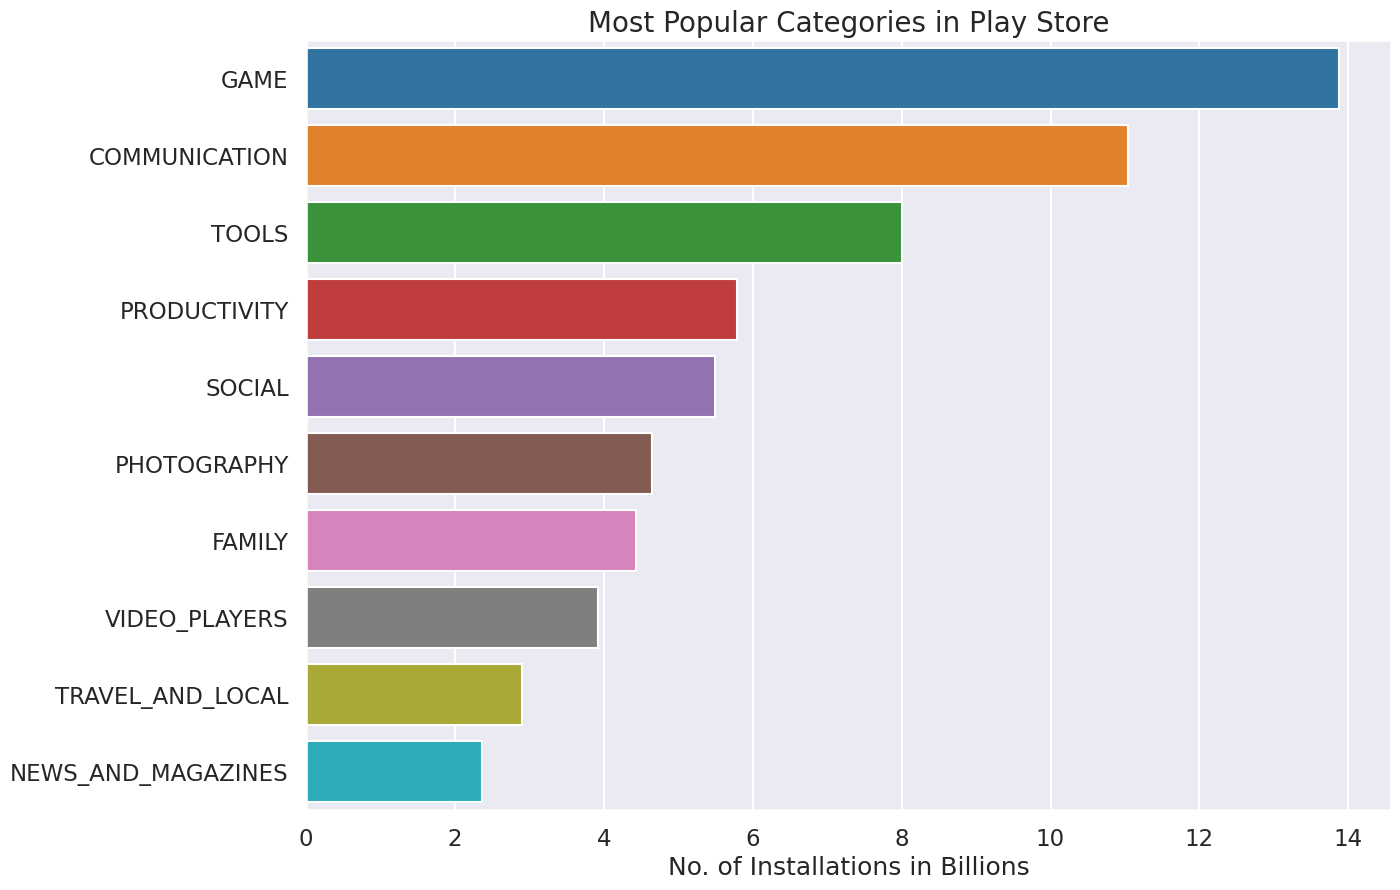

In [385]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum(
).sort_values(ascending=False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs / \
    1000000000  # converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize=(14, 10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x='Installs', y='Category', data=df2)
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size=20)


# Incomplete

#### 2. What are the Top 5 most installed Apps in Each popular Categories ??


In [386]:
dt = df_copy.groupby(['Category', 'Installs'])[['App']].sum(
).sort_values(by=['Category', 'Installs'], ascending=False).reset_index()
# dt.head()
# for i in dt.columns:
#     count=0
#     temp = df[i]
        
dt.head()

,Category,Installs,App
0,WEATHER,50000000,The Weather Channel: Rain Forecast & Storm Ale...
1,WEATHER,10000000,"Weather by WeatherBug: Forecast, Radar & Alert..."
2,WEATHER,5000000,Weather CraveMETEO FRANCEAPE Weather ( Live Fo...
3,WEATHER,1000000,Weather forecastweather - weather forecastSMHI...
4,WEATHER,500000,Klara weatherLocal Weather Forecast & Visual W...


In [387]:
dt['Category'].unique()

array(['WEATHER', 'VIDEO_PLAYERS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'SPORTS',
       'SOCIAL', 'SHOPPING', 'PRODUCTIVITY', 'PHOTOGRAPHY',
       'PERSONALIZATION', 'PARENTING', 'NEWS_AND_MAGAZINES', 'MEDICAL',
       'MAPS_AND_NAVIGATION', 'LIFESTYLE', 'LIBRARIES_AND_DEMO',
       'HOUSE_AND_HOME', 'HEALTH_AND_FITNESS', 'GAME', 'FOOD_AND_DRINK',
       'FINANCE', 'FAMILY', 'EVENTS', 'ENTERTAINMENT', 'EDUCATION',
       'DATING', 'COMMUNICATION', 'COMICS', 'BUSINESS',
       'BOOKS_AND_REFERENCE', 'BEAUTY', 'AUTO_AND_VEHICLES',
       'ART_AND_DESIGN'], dtype=object)

In [388]:
dt['App'][dt['Category']=='WEATHER'].head()

0    The Weather Channel: Rain Forecast & Storm Ale...
1    Weather by WeatherBug: Forecast, Radar & Alert...
2    Weather CraveMETEO FRANCEAPE Weather ( Live Fo...
3    Weather forecastweather - weather forecastSMHI...
4    Klara weatherLocal Weather Forecast & Visual W...
Name: App, dtype: object

In [401]:
# dt.head()
for i in dt['Category'].unique():
    print("Top 5 apps for category", i, "are :", end='')
    print(dt[['App']][dt['Category'] == i].reset_index(drop=True).head(), "\n")


Top 5 apps for category WEATHER are :                                                 App
0  The Weather Channel: Rain Forecast & Storm Ale...
1  Weather by WeatherBug: Forecast, Radar & Alert...
2  Weather CraveMETEO FRANCEAPE Weather ( Live Fo...
3  Weather forecastweather - weather forecastSMHI...
4  Klara weatherLocal Weather Forecast & Visual W... 

Top 5 apps for category VIDEO_PLAYERS are :                                                 App
0                     YouTubeGoogle Play Movies & TV
1                                          MX Player
2  Motorola FM RadioMotorola GalleryVLC for Andro...
3  Vote forVigo VideoMiniMovie - Free Video and S...
4  Video DownloaderVideo Player All FormatCodeMus... 

Top 5 apps for category TRAVEL_AND_LOCAL are :                                                 App
0        Maps - Navigate & ExploreGoogle Street View
1  Booking.com Travel DealsTripAdvisor Hotels Fli...
2  trivago: Hotels & TravelVZ Navigator2GIS: dire...
3  Expedia Hotels, Fli

In [390]:
df_cat_installs = df_copy.groupby(
    ['Category', 'Installs'])[['App']].sum().sort_values(by=['Category', 'Installs'], ascending=False).reset_index()
# df_cat_installs.drop_duplicates('Category', inplace=True)
# count = 0
# for i in df_cat_installs['App']:
#     print(i, "\n")
#     count += 1
#     if (count == 5):
#         count = 0
#         break
df_cat_installs['Category']

# df_cat_installs['Category'][:5]
# df_cat_installs.reset_index(drop=True, inplace=True)
# df_cat_installs.groupby(['Category']).head()


0             WEATHER
1             WEATHER
2             WEATHER
3             WEATHER
4             WEATHER
            ...      
507    ART_AND_DESIGN
508    ART_AND_DESIGN
509    ART_AND_DESIGN
510    ART_AND_DESIGN
511    ART_AND_DESIGN
Name: Category, Length: 512, dtype: object

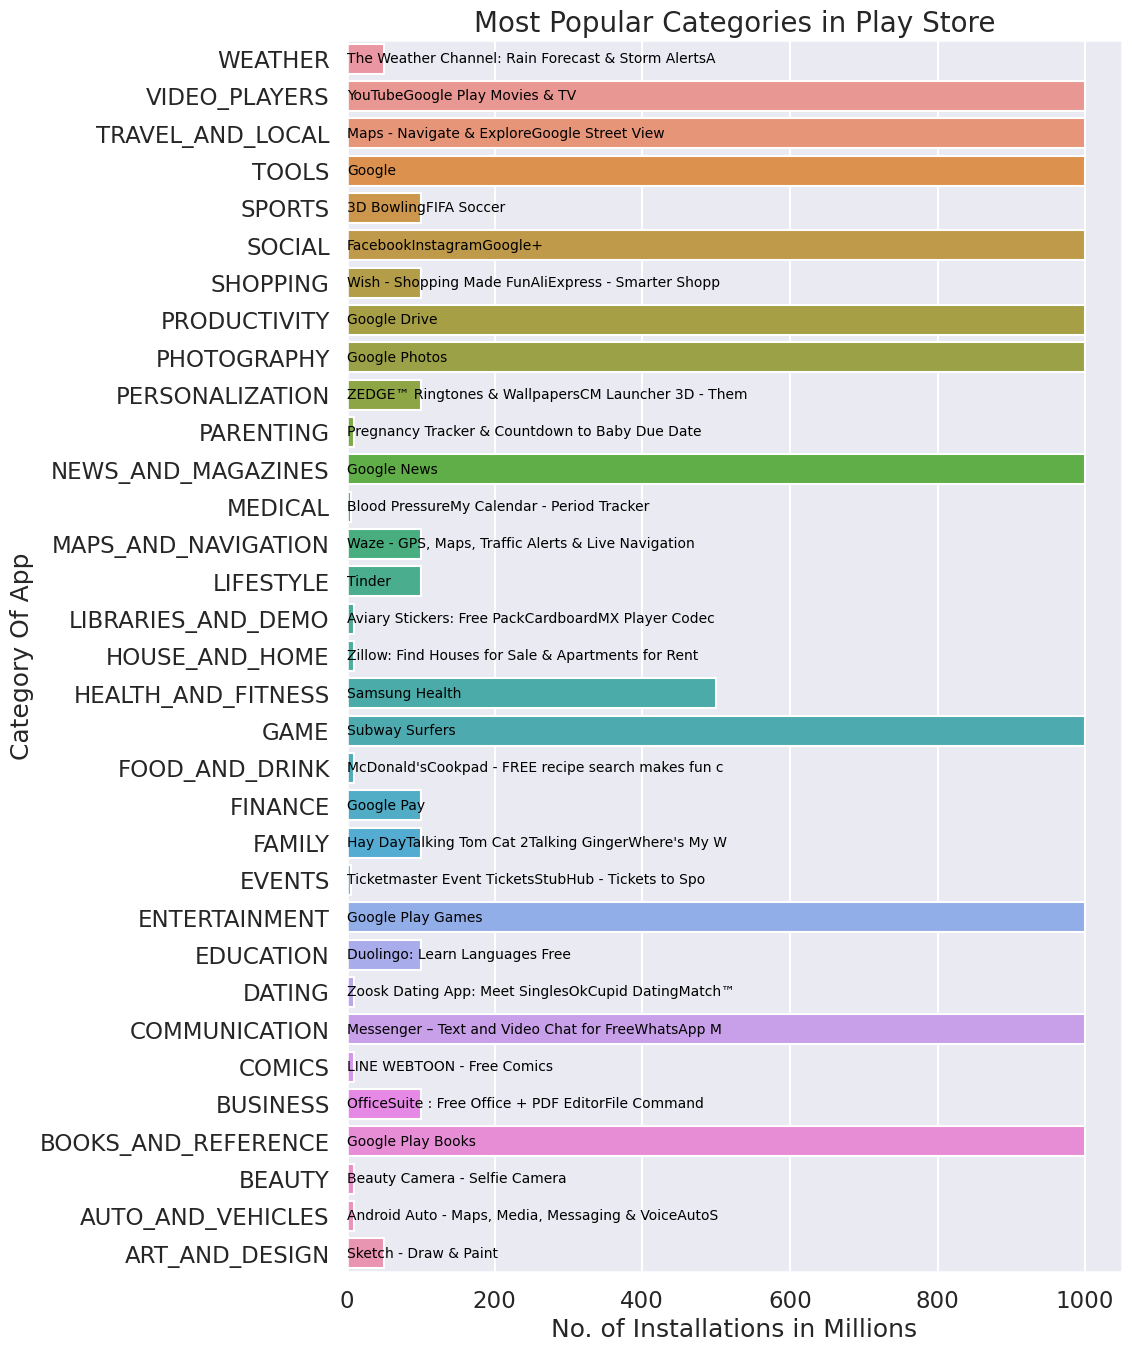

In [391]:
df_cat_installs = df_copy.groupby(
    ['Category', 'Installs'])[['App']].sum().sort_values(by=['Category', 'Installs'], ascending=False).reset_index()
df_cat_installs.drop_duplicates('Category', inplace=True)
df_cat_installs.reset_index(drop=True, inplace=True)
df_cat_installs

df_cat_installs.Installs = df_cat_installs.Installs / \
    1000000  # converting into millions

plt.figure(figsize=(10, 16))
sns.set_context("talk")
sns.set_style("darkgrid")
ls = list(df_cat_installs['App'].str[:50])
ax = sns.barplot(x='Installs', y='Category', data=df_cat_installs)

ax.set_xlabel('No. of Installations in Millions')
ax.set_ylabel('Category Of App')

ax.set_title("Most Popular Categories in Play Store", size=20)
for bar, ls in zip(ax.patches, ls[:]):
    ax.text(0.1, bar.get_y()+bar.get_height()/2,
            ls, color='black', ha='left', va='center', size=10)


#### 3. How many apps are there on Google Play Store which get 5 ratings??


In [392]:
print('Apps with 5 rating on play store are : ', (df['Rating'] == 5.0).sum())

Apps with 5 rating on play store are :  274


#### Apps with 5 rating on play store are : 274
